In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\jj.csv")

In [3]:
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [4]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# GRAPH

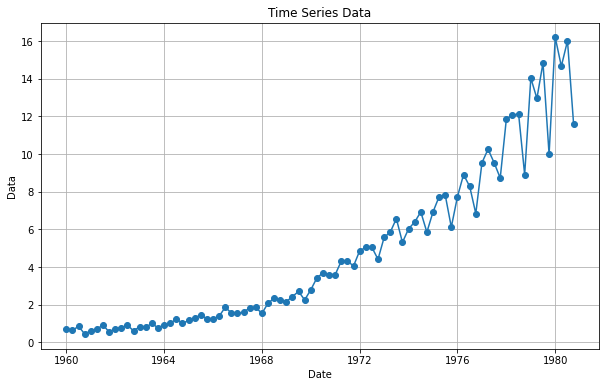

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df.index.to_numpy(), df['data'].to_numpy(), marker='o')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Data')
plt.grid(True)
plt.show()

# ADF TEST

In [7]:
df

,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61
...,...
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67


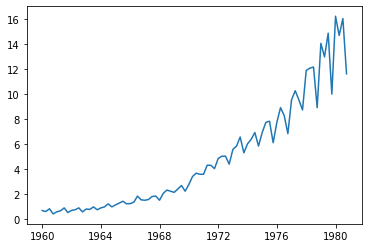

In [8]:
plt.plot(df["data"])

In [9]:
X = df["data"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

NameError: name 'adfuller' is not defined

In [ ]:
df["Diff_Value"] = df["Value"].diff()

# VISUALIZING

<Figure size 864x576 with 0 Axes>

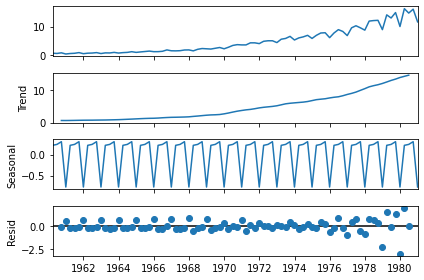

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path ='C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\jj.csv' # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Adjusting the date to the first day of the quarter
data.index = data.index.to_period('Q').to_timestamp('Q')
data_interpolated = data.interpolate()

# Decomposing the time series
decomposition = seasonal_decompose(data_interpolated, model='additive')

# Plotting the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


# HOLT WINTERS MODEL

In [11]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\jj.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Adjusting the date to the first day of the quarter
data.index = data.index.to_period('Q').to_timestamp('Q')

# Interpolating missing values (if any)
data_interpolated = data.interpolate()

# Fitting the Holt-Winters multiplicative model
model = ExponentialSmoothing(data_interpolated, trend='add', seasonal='mul', seasonal_periods=4).fit()

# Forecasting for the next 1, 2, 3, and 4 years (4, 8, 12, and 16 quarters)
forecast_periods = [4 * year for year in range(1, 5)]
forecasts = {periods: model.forecast(periods) for periods in forecast_periods}

# Printing the forecasts
for periods, forecast in forecasts.items():
    print(f"Forecast for next {periods // 4} year(s):\n{forecast}\n")


Forecast for next 1 year(s):
1981-03-31    17.982669
1981-06-30    16.380987
1981-09-30    17.944927
1981-12-31    12.467667
Freq: Q-DEC, dtype: float64

Forecast for next 2 year(s):
1981-03-31    17.982669
1981-06-30    16.380987
1981-09-30    17.944927
1981-12-31    12.467667
1982-03-31    19.854927
1982-06-30    18.043222
1982-09-30    19.720808
1982-12-31    13.671714
Freq: Q-DEC, dtype: float64

Forecast for next 3 year(s):
1981-03-31    17.982669
1981-06-30    16.380987
1981-09-30    17.944927
1981-12-31    12.467667
1982-03-31    19.854927
1982-06-30    18.043222
1982-09-30    19.720808
1982-12-31    13.671714
1983-03-31    21.727186
1983-06-30    19.705456
1983-09-30    21.496690
1983-12-31    14.875762
Freq: Q-DEC, dtype: float64

Forecast for next 4 year(s):
1981-03-31    17.982669
1981-06-30    16.380987
1981-09-30    17.944927
1981-12-31    12.467667
1982-03-31    19.854927
1982-06-30    18.043222
1982-09-30    19.720808
1982-12-31    13.671714
1983-03-31    21.727186
1983-

In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to perform in-sample forecast and calculate metrics
def in_sample_forecast_metrics(data, years):
    quarters = years * 4
    train = data[:-quarters]
    test = data[-quarters:]

    model = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=4).fit()
    predictions = model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test, predictions)
    r2 = r2_score(test, predictions)
    
    return predictions, mse, rmse, mape, r2


# Calculating metrics for 1, 2, 3, and 4 years
metrics_holt = {}
for years in range(1, 5):
    _, mse, rmse, mape, r2 = in_sample_forecast_metrics(data_interpolated, years)
    metrics_holt[years] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }

# Print the metrics
for year, values in metrics_holt.items():
    print(f"{year}-Year Metrics:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


1-Year Metrics:
  MSE: 0.08626167357991055
  RMSE: 0.29370337686160597
  MAPE: 14.33833095665402
  R2: 0.9744767182004718

2-Year Metrics:
  MSE: 1.708079769347457
  RMSE: 1.3069352582846088
  MAPE: 15.141128439521504
  R2: 0.5811316288547208

3-Year Metrics:
  MSE: 2.0353649231426414
  RMSE: 1.426662161530417
  MAPE: 17.771078199113724
  R2: 0.5729966332273585

4-Year Metrics:
  MSE: 7.721581236909251
  RMSE: 2.7787733331290716
  MAPE: 21.46117469207366
  R2: -0.3197133925854003



# ACF PLOT

<Figure size 2880x7200 with 0 Axes>

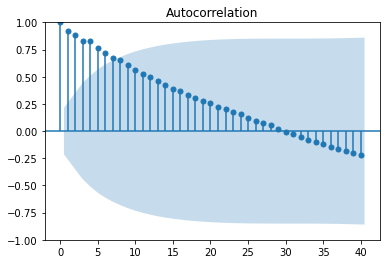

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\jj.csv'   # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Adjusting the date to the first day of the quarter
data.index = data.index.to_period('Q').to_timestamp('Q')
data_interpolated = data.interpolate()

# Plotting the ACF and PACF

# Plotting the Autocorrelation Function (ACF)
plt.figure(figsize=(40, 100))
sm.graphics.tsa.plot_acf(data_interpolated, lags=40)
plt.show()

FROM THE PLOT WE CAN GET THE VALUE OF q=6 (approx)

# PACF PLOT

<Figure size 864x432 with 0 Axes>

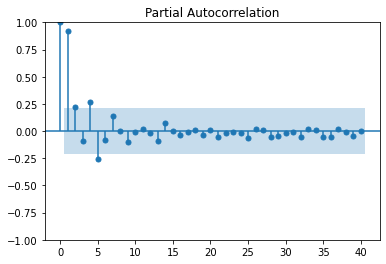

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\jj.csv'   # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Adjusting the date to the first day of the quarter
data.index = data.index.to_period('Q').to_timestamp('Q')
data_interpolated = data.interpolate()

# Plotting the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(data_interpolated, lags=40)
plt.show()

FROM THE PLOT WE CAN GET VALUE OF p=5

# AR p=5

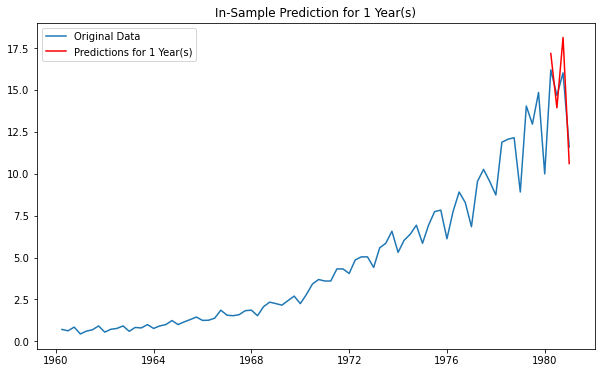

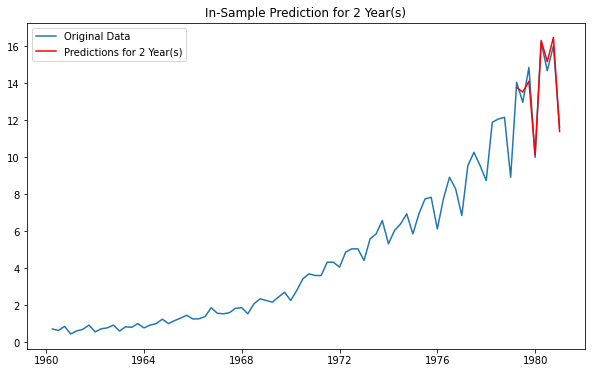

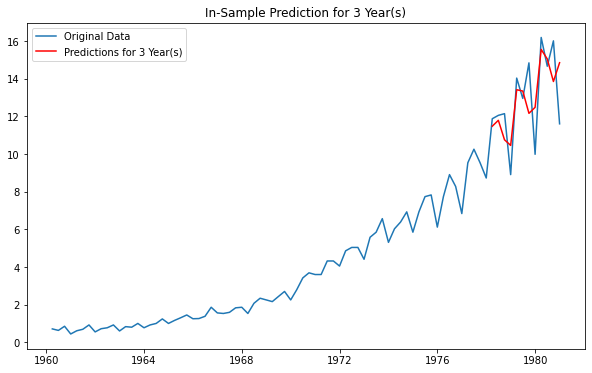

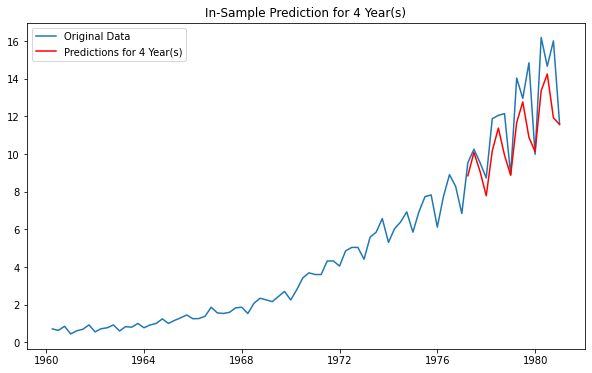

Metrics for 1-Year In-Sample Prediction:
  MSE: 1.7363677685069558
  RMSE: 1.3177130827714187
  MAPE: 8.206153447235955
  R2: 0.4862399252877214

Metrics for 2-Year In-Sample Prediction:
  MSE: 0.18344531687645077
  RMSE: 0.42830516793105683
  MAPE: 2.6550018458314337
  R2: 0.9550141378329048

Metrics for 3-Year In-Sample Prediction:
  MSE: 2.859056972502437
  RMSE: 1.690874617617296
  MAPE: 11.074799303240477
  R2: 0.40019259486482817

Metrics for 4-Year In-Sample Prediction:
  MSE: 3.5044084205817567
  RMSE: 1.8720065225799178
  MAPE: 9.725523288313031
  R2: 0.40105341330553834



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to perform in-sample prediction and calculate metrics
def in_sample_prediction_with_metrics(data, lags, years):
    train = data[:-years * 4]
    test = data[-years * 4:]
    model = AutoReg(train, lags=lags).fit()
    predictions = model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test.values.flatten(), predictions)
    r2 = r2_score(test, predictions)

    return predictions, mse, rmse, mape, r2

# Load and prepare the dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\jj.csv'
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.index = data.index.to_period('Q').to_timestamp('Q')
data_interpolated = data.interpolate()

# In-sample predictions and metrics calculation for 1, 2, 3, and 4 years
lags = 5  # Adjust as necessary
metrics_ar = {}
for years in range(1, 5):
    predictions, mse, rmse, mape, r2 = in_sample_prediction_with_metrics(data_interpolated, lags, years)
    metrics_ar[years] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

    # Plotting the predictions
    plt.figure(figsize=(10, 6))
    plt.plot(data_interpolated, label='Original Data')
    plt.plot(predictions, label=f'Predictions for {years} Year(s)', color='red')
    plt.title(f'In-Sample Prediction for {years} Year(s)')
    plt.legend()
    plt.show()

# Print the metrics
for year, values in metrics_ar.items():
    print(f"Metrics for {year}-Year In-Sample Prediction:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


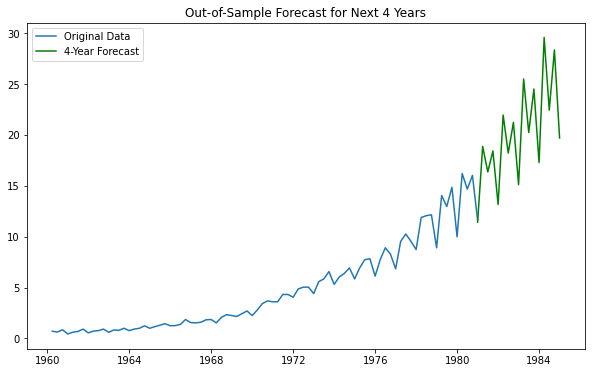

In [16]:
# Out-of-sample forecasting for the next four years
model = AutoReg(data_interpolated, lags=lags).fit()
forecast = model.predict(start=data_interpolated.index[-1], end=data_interpolated.index[-1] + pd.DateOffset(years=4), dynamic=True)

plt.figure(figsize=(10, 6))
plt.plot(data_interpolated, label='Original Data')
plt.plot(forecast, label='4-Year Forecast', color='green')
plt.title('Out-of-Sample Forecast for Next 4 Years')
plt.legend()
plt.show()


# MA q=6

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


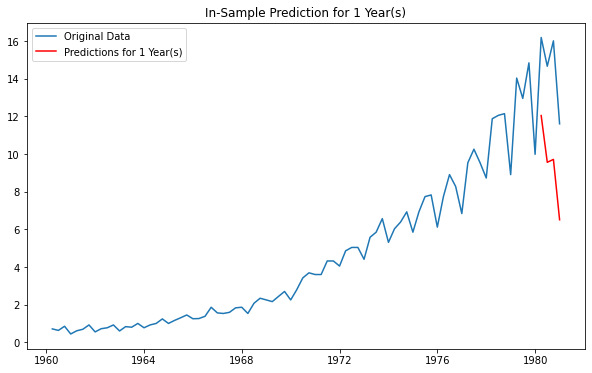

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


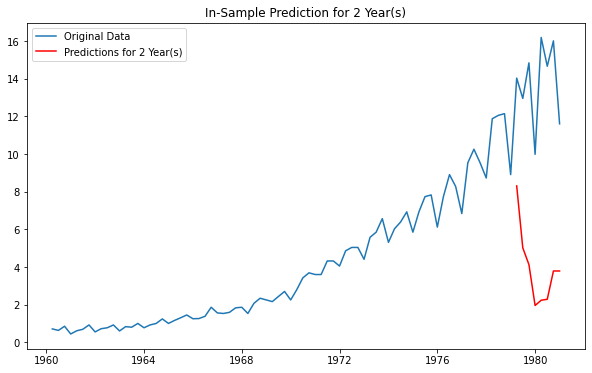

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


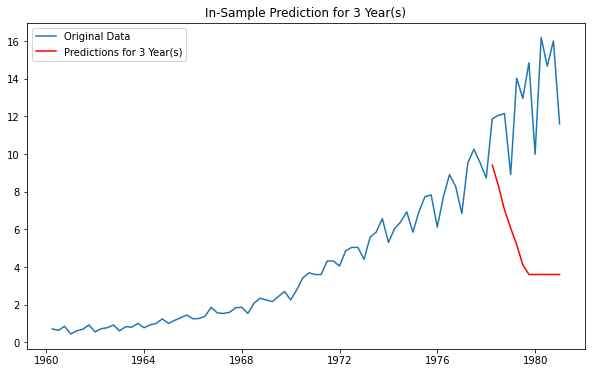

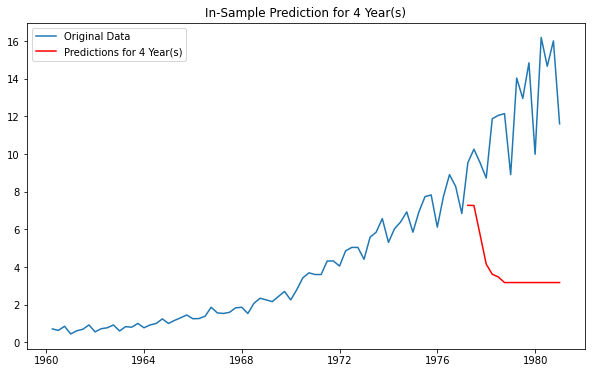

Metrics for 1-Year In-Sample Prediction:
  MSE: 27.249165093638496
  RMSE: 5.220073284316849
  MAPE: 35.919488263627265
  R2: -7.062539139615943

Metrics for 2-Year In-Sample Prediction:
  MSE: 104.34114003420802
  RMSE: 10.214751099963621
  MAPE: 71.13701799597864
  R2: -24.58733154849497

Metrics for 3-Year In-Sample Prediction:
  MSE: 73.13918200963802
  RMSE: 8.552144877727342
  MAPE: 58.031165602121945
  R2: -14.344018463721824

Metrics for 4-Year In-Sample Prediction:
  MSE: 77.49381235193812
  RMSE: 8.803056989020241
  MAPE: 64.73897155548677
  R2: -12.244647548937598



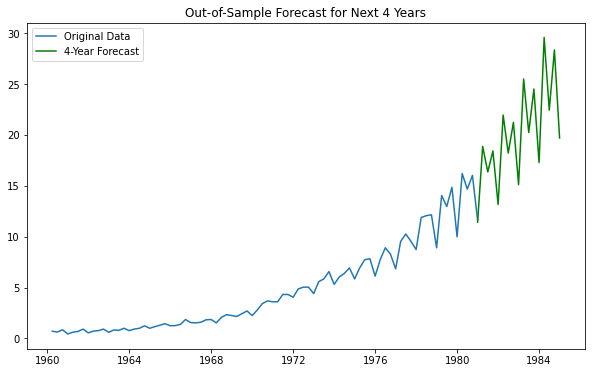

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function for in-sample prediction and metrics calculation
def in_sample_prediction_with_metrics(data, order, years):
    train = data[:-years * 4]
    test = data[-years * 4:]
    model = ARIMA(train, order=order).fit()
    predictions = model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test.values.flatten(), predictions)
    r2 = r2_score(test, predictions)

    return predictions, mse, rmse, mape, r2

# Load and prepare the dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\jj.csv'
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.index = data.index.to_period('Q').to_timestamp('Q')
data_interpolated = data.interpolate()

# MA model order (0, 0, q)
order = (0, 0, 6)  #q=6

# In-sample predictions and metrics calculation
metrics_ma = {}
for years in range(1, 5):
    predictions, mse, rmse, mape, r2 = in_sample_prediction_with_metrics(data_interpolated, order, years)
    metrics_ma[years] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

    # Plotting the predictions
    plt.figure(figsize=(10, 6))
    plt.plot(data_interpolated, label='Original Data')
    plt.plot(predictions, label=f'Predictions for {years} Year(s)', color='red')
    plt.title(f'In-Sample Prediction for {years} Year(s)')
    plt.legend()
    plt.show()

# Print the metrics
for year, values in metrics_ma.items():
    print(f"Metrics for {year}-Year In-Sample Prediction:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


plt.figure(figsize=(10, 6))
plt.plot(data_interpolated, label='Original Data')
plt.plot(forecast, label='4-Year Forecast', color='green')
plt.title('Out-of-Sample Forecast for Next 4 Years')
plt.legend()
plt.show()


C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


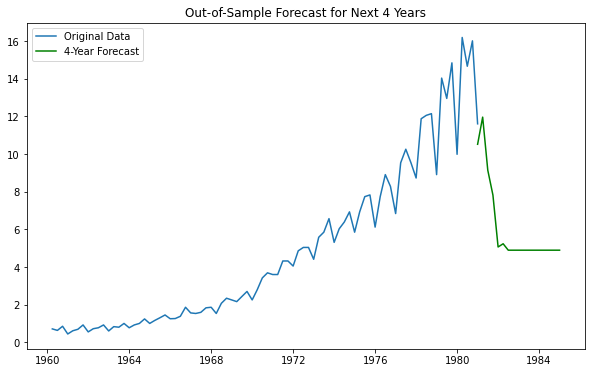

In [18]:
# Out-of-sample forecasting for the next four years
model = ARIMA(data_interpolated, order=order).fit()
forecast = model.predict(start=data_interpolated.index[-1], end=data_interpolated.index[-1] + pd.DateOffset(years=4), dynamic=True)

plt.figure(figsize=(10, 6))
plt.plot(data_interpolated, label='Original Data')
plt.plot(forecast, label='4-Year Forecast', color='green')
plt.title('Out-of-Sample Forecast for Next 4 Years')
plt.legend()
plt.show()


# ARMA p=5 AND q=6

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


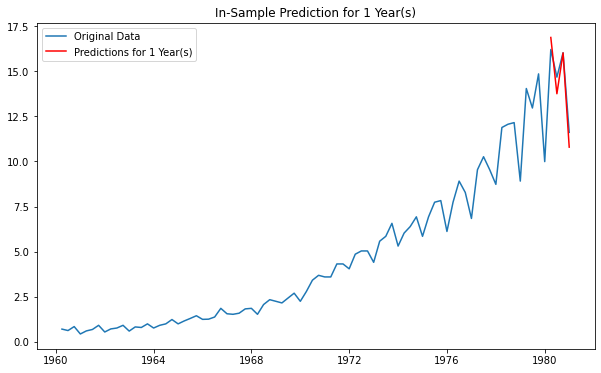

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


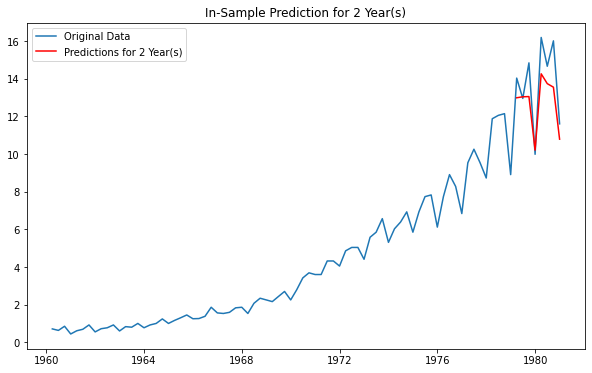

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


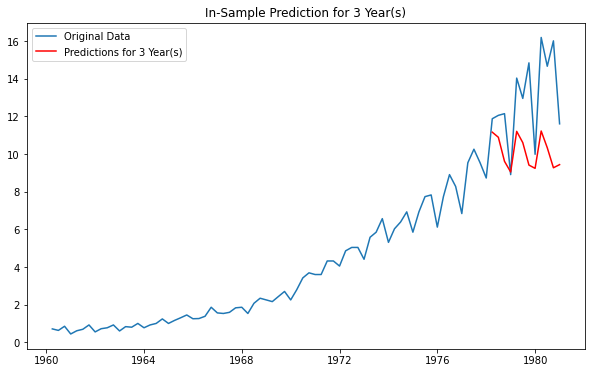

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


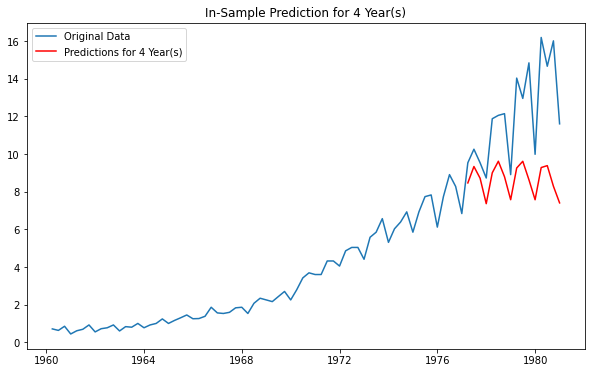

Metrics for 1-Year In-Sample Prediction:
  MSE: 0.49072156014946966
  RMSE: 0.700515210505432
  MAPE: 4.371357529122941
  R2: 0.8548042932044857

Metrics for 2-Year In-Sample Prediction:
  MSE: 1.95973511798729
  RMSE: 1.3999053960847818
  MAPE: 7.8772601498849575
  R2: 0.5194187815589328

Metrics for 3-Year In-Sample Prediction:
  MSE: 12.134963680867289
  RMSE: 3.483527476691879
  MAPE: 20.122724688884638
  R2: -1.5458188300668279

Metrics for 4-Year In-Sample Prediction:
  MSE: 16.45608402671614
  RMSE: 4.0566099179876955
  MAPE: 26.27331959070325
  R2: -1.8125475616003301



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function for in-sample prediction and metrics calculation
def in_sample_prediction_with_metrics(data, order, years):
    train = data[:-years * 4]  # 4 quarters per year
    test = data[-years * 4:]
    model = ARIMA(train, order=order)
    fitted_model = model.fit()
    predictions = fitted_model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test.values.flatten(), predictions)
    r2 = r2_score(test, predictions)

    return predictions, mse, rmse, mape, r2


# Load and prepare the dataset
file_path ='C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\jj.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.index = data.index.to_period('Q').to_timestamp('Q')
data_interpolated = data.interpolate()
# ARMA model order (p, d, q)
order = (5, 0, 6)  # p=5, d=0, q=6

# In-sample predictions and metrics calculation
metrics_arma = {}
for years in range(1, 5):
    predictions, mse, rmse, mape, r2 = in_sample_prediction_with_metrics(data_interpolated, order, years)
    metrics_arma[years] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

    # Plotting the predictions
    plt.figure(figsize=(10, 6))
    plt.plot(data_interpolated, label='Original Data')
    plt.plot(predictions, label=f'Predictions for {years} Year(s)', color='red')
    plt.title(f'In-Sample Prediction for {years} Year(s)')
    plt.legend()
    plt.show()

# Print the metrics
for year, values in metrics_arma.items():
    print(f"Metrics for {year}-Year In-Sample Prediction:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()



C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


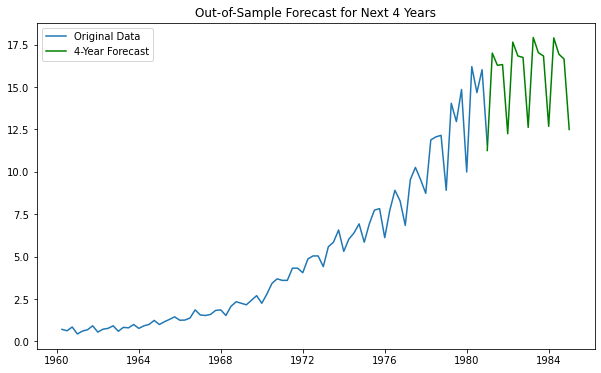

In [20]:

# Out-of-sample forecasting for the next four years
model = ARIMA(data_interpolated, order=order)
fitted_model = model.fit()
forecast = fitted_model.predict(start=data_interpolated.index[-1], end=data_interpolated.index[-1] + pd.DateOffset(years=4), dynamic=True)

plt.figure(figsize=(10, 6))
plt.plot(data_interpolated, label='Original Data')
plt.plot(forecast, label='4-Year Forecast', color='green')
plt.title('Out-of-Sample Forecast for Next 4 Years')
plt.legend()
plt.show()

# ARIMA p=5,q=6 and d=10

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


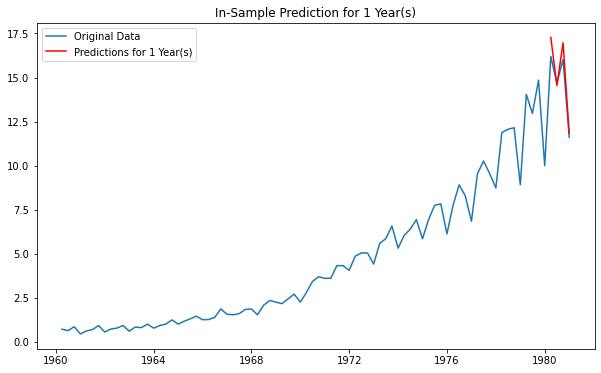

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


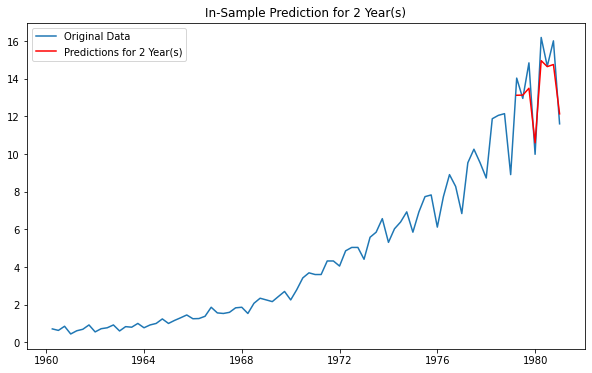

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


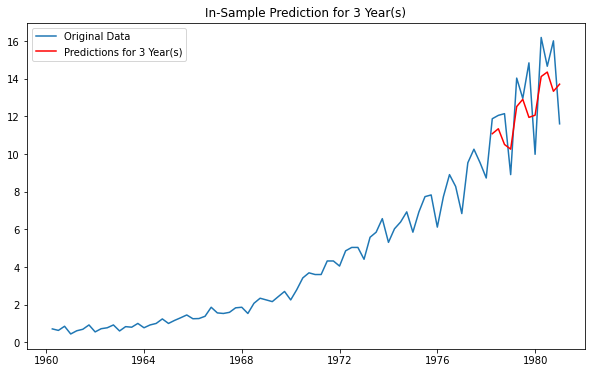

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


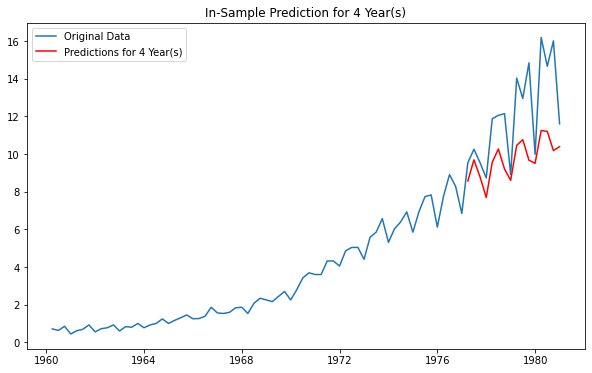

Metrics for 1-Year In-Sample Prediction:
  MSE: 0.5313366498594176
  RMSE: 0.7289284257452289
  MAPE: 3.827018524317006
  R2: 0.8427870167367411

Metrics for 2-Year In-Sample Prediction:
  MSE: 0.8058258451280973
  RMSE: 0.8976780297679661
  MAPE: 5.405227230685384
  R2: 0.8023892295706285

Metrics for 3-Year In-Sample Prediction:
  MSE: 3.0578425150002104
  RMSE: 1.7486687836752306
  MAPE: 11.878659839926813
  R2: 0.3584889696587813

Metrics for 4-Year In-Sample Prediction:
  MSE: 8.543364036079037
  RMSE: 2.9229033572937433
  MAPE: 17.517938253728172
  R2: -0.4601662004476912



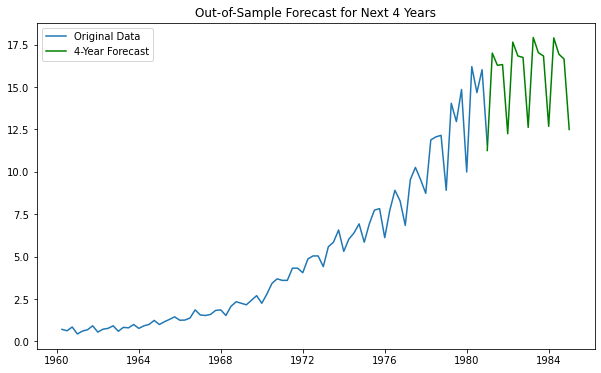

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function for in-sample prediction and metrics calculation
def in_sample_prediction_with_metrics(data, order, years):
    train = data[:-years * 4]  # 4 quarters per year
    test = data[-years * 4:]
    model = ARIMA(train, order=order)
    fitted_model = model.fit()
    predictions = fitted_model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test.values.flatten(), predictions)
    r2 = r2_score(test, predictions)

    return predictions, mse, rmse, mape, r2

# Load and prepare the dataset
file_path ='C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\jj.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.index = data.index.to_period('Q').to_timestamp('Q')
data_interpolated = data.interpolate()
# ARMA model order (p, d, q)
# ARIMA model order (p, d, q)
order = (5, 1, 6)  # Example: p=5, d=1, q=6

# In-sample predictions and metrics calculation
metrics_arima = {}
for years in range(1, 5):
    predictions, mse, rmse, mape, r2 = in_sample_prediction_with_metrics(data_interpolated, order, years)
    metrics_arima[years] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

    # Plotting the predictions
    plt.figure(figsize=(10, 6))
    plt.plot(data_interpolated, label='Original Data')
    plt.plot(predictions, label=f'Predictions for {years} Year(s)', color='red')
    plt.title(f'In-Sample Prediction for {years} Year(s)')
    plt.legend()
    plt.show()

# Print the metrics
for year, values in metrics_arima.items():
    print(f"Metrics for {year}-Year In-Sample Prediction:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


plt.figure(figsize=(10, 6))
plt.plot(data_interpolated, label='Original Data')
plt.plot(forecast, label='4-Year Forecast', color='green')
plt.title('Out-of-Sample Forecast for Next 4 Years')
plt.legend()
plt.show()


C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


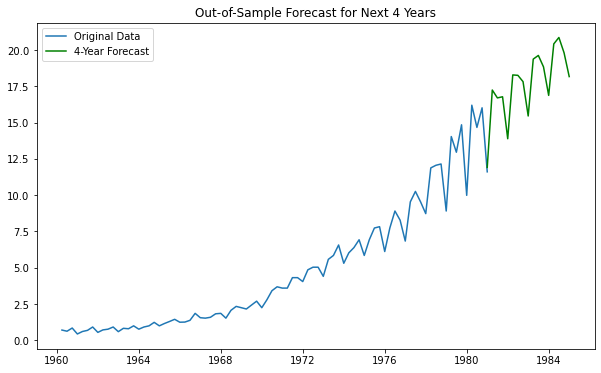

In [22]:
# Out-of-sample forecasting for the next four years
model = ARIMA(data_interpolated, order=order)
fitted_model = model.fit()
forecast = fitted_model.predict(start=data_interpolated.index[-1], end=data_interpolated.index[-1] + pd.DateOffset(years=4), dynamic=True)

plt.figure(figsize=(10, 6))
plt.plot(data_interpolated, label='Original Data')
plt.plot(forecast, label='4-Year Forecast', color='green')
plt.title('Out-of-Sample Forecast for Next 4 Years')
plt.legend()
plt.show()

# SARIMA

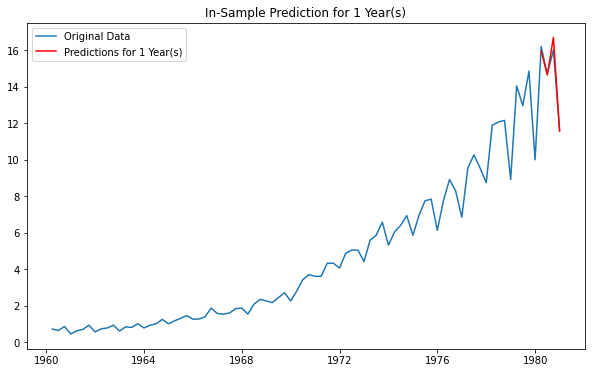

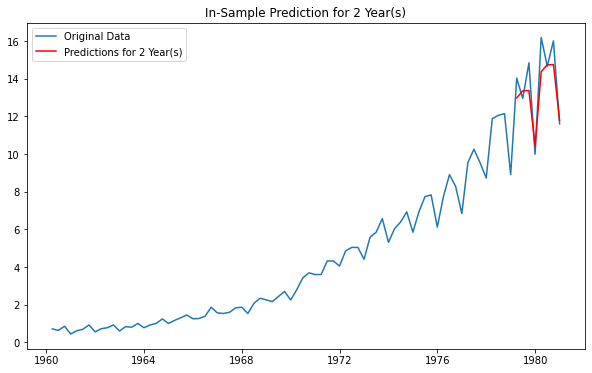

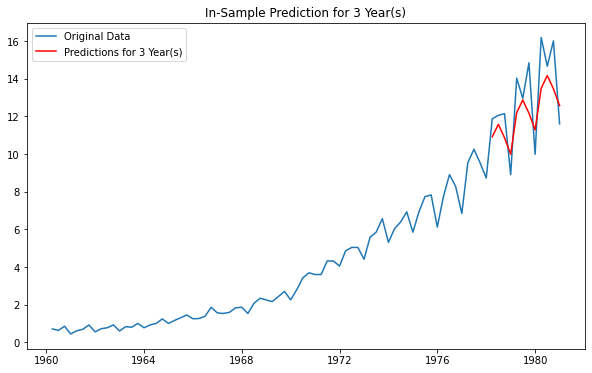

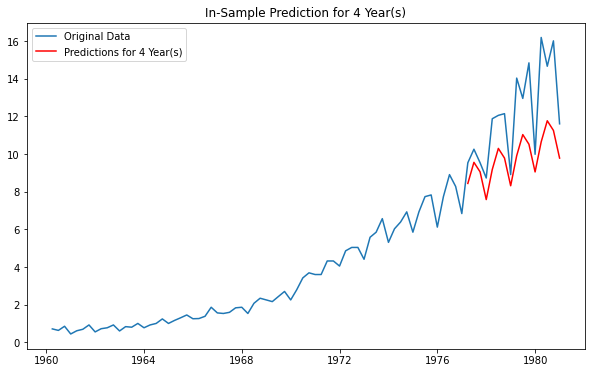

Metrics for 1-Year In-Sample Prediction:
  MSE: 0.12994688990693914
  RMSE: 0.36048146957498267
  MAPE: 1.5851894933212238
  R2: 0.9615510463404747

Metrics for 2-Year In-Sample Prediction:
  MSE: 1.0704729993308812
  RMSE: 1.0346366508735718
  MAPE: 5.76235693179481
  R2: 0.7374904324544359

Metrics for 3-Year In-Sample Prediction:
  MSE: 2.596420155603935
  RMSE: 1.6113411046714892
  MAPE: 10.308108304534883
  R2: 0.45529170941621466

Metrics for 4-Year In-Sample Prediction:
  MSE: 7.815347941932836
  RMSE: 2.7955943807950456
  MAPE: 17.626930757157208
  R2: -0.335739278035744



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function for in-sample prediction and metrics calculation
def in_sample_prediction_with_metrics(data, order, seasonal_order, years):
    train = data[:-years * 4]  # 4 quarters per year
    test = data[-years * 4:]
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    fitted_model = model.fit(disp=False)
    predictions = fitted_model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test.values.flatten(), predictions)
    r2 = r2_score(test, predictions)

    return predictions, mse, rmse, mape, r2

# Load and prepare the dataset
file_path ='C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\jj.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.index = data.index.to_period('Q').to_timestamp('Q')
data_interpolated = data.interpolate()

# SARIMA model order (p, d, q) and seasonal order (P, D, Q, s)
order = (1, 1, 1)  # Example: p=1, d=1, q=1
seasonal_order = (1, 1, 1, 4)  # Example: P=1, D=1, Q=1, s=4 (quarterly data)

# In-sample predictions and metrics calculation
metrics_sarima = {}
for years in range(1, 5):
    predictions, mse, rmse, mape, r2 = in_sample_prediction_with_metrics(data_interpolated['data'], order, seasonal_order, years)
    metrics_sarima[years] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

    # Plotting the predictions
    plt.figure(figsize=(10, 6))
    plt.plot(data_interpolated['data'], label='Original Data')
    plt.plot(predictions, label=f'Predictions for {years} Year(s)', color='red')
    plt.title(f'In-Sample Prediction for {years} Year(s)')
    plt.legend()
    plt.show()

# Print the metrics
for year, values in metrics_sarima.items():
    print(f"Metrics for {year}-Year In-Sample Prediction:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()



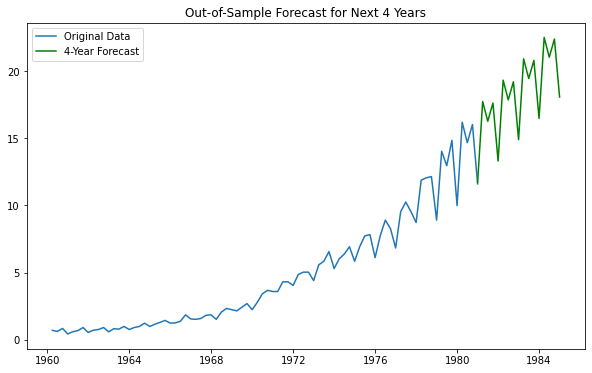

In [24]:
# Out-of-sample forecasting for the next four years
model = SARIMAX(data_interpolated['data'], order=order, seasonal_order=seasonal_order)
fitted_model = model.fit(disp=False)
forecast = fitted_model.predict(start=data_interpolated.index[-1], end=data_interpolated.index[-1] + pd.DateOffset(years=4), dynamic=True)

plt.figure(figsize=(10, 6))
plt.plot(data_interpolated['data'], label='Original Data')
plt.plot(forecast, label='4-Year Forecast', color='green')
plt.title('Out-of-Sample Forecast for Next 4 Years')
plt.legend()
plt.show()


# LSTM

In [25]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Helper function to create a dataset suitable for time series forecasting
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

file_path ='C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\jj.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)


# Data preprocessing
values = data['data'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# LSTM model setup
look_back = 1
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# In-sample predictions and metrics calculation
years = [1, 2, 3, 4]  # Years for in-sample prediction
quarters_per_year = 4
metrics_lstm = {}

for year in years:
    train_size = len(scaled_values) - year * quarters_per_year
    train, test = scaled_values[0:train_size], scaled_values[train_size - look_back - 1:len(scaled_values) - 1]

    X_train, Y_train = create_dataset(train, look_back)
    X_test, Y_test = create_dataset(test, look_back)

    # Reshape input to be [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Fit the model
    model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=0)

    # Predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Invert predictions
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    Y_train_inv = scaler.inverse_transform([Y_train])
    Y_test_inv = scaler.inverse_transform([Y_test])

    # Metrics calculation
    mse = mean_squared_error(Y_test_inv[0], test_predict[:, 0])
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(Y_test_inv[0], test_predict[:, 0])
    r2 = r2_score(Y_test_inv[0], test_predict[:, 0])

    metrics_lstm[year] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

# Out-of-sample forecast (next four years)
forecast_periods = 4 * quarters_per_year
X_all, Y_all = create_dataset(scaled_values, look_back)
X_all = X_all.reshape((X_all.shape[0], 1, X_all.shape[1]))
model.fit(X_all, Y_all, epochs=100, batch_size=1, verbose=0)

# Generate predictions for the next four years
input_seq = scaled_values[-look_back:]
forecast = []
for _ in range(forecast_periods):
    prediction = model.predict(input_seq.reshape((1, 1, look_back)))
    forecast.append(prediction[0, 0])
    input_seq = np.roll(input_seq, -1)
    input_seq[-1] = prediction

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Print metrics
for year, values in metrics_lstm.items():
    print(f"Metrics for {year}-Year In-Sample Prediction:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


1/1 [==============================] - 0s 38ms/step
Metrics for 1-Year In-Sample Prediction:
  MSE: 19.828618641641107
  RMSE: 4.45293371179508
  MAPE: 31.621209115925435
  R2: -1.8413462072107745

Metrics for 2-Year In-Sample Prediction:
  MSE: 13.7053809881595
  RMSE: 3.7020779284287766
  MAPE: 24.645621705299806
  R2: -1.2172950060612937

Metrics for 3-Year In-Sample Prediction:
  MSE: 10.011925835763876
  RMSE: 3.164162738508226
  MAPE: 19.58574800902366
  R2: -0.8202279441777283

Metrics for 4-Year In-Sample Prediction:
  MSE: 8.352774059614287
  RMSE: 2.890116616957573
  MAPE: 18.768181532767773
  R2: -0.24765542528721496



In [26]:
forecast

array([[11.216663],
       [10.915814],
       [10.681383],
       [10.496074],
       [10.347948],
       [10.228492],
       [10.131471],
       [10.052218],
       [ 9.987177],
       [ 9.933598],
       [ 9.889319],
       [ 9.852633],
       [ 9.822175],
       [ 9.796839],
       [ 9.775738],
       [ 9.75814 ]], dtype=float32)